## Investigasi sampel data titanic berikut dengan cara :
1. Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
2. Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
3. Cek apakah ada duplikat dan bagaimana handlenya ?
4. Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

## Import Libraries

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Load Data

In [186]:
# import data
df = pd.read_excel('titanic.xlsx')
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


## Premilinary

In [187]:
df.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [188]:
df.head(10)

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000
5,1,"Anderson, Mr. Harry",male,48.0000
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000
7,0,"Andrews, Mr. Thomas Jr",male,39.0000
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000
9,0,"Artagaveytia, Mr. Ramon",male,71.0000


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


### Observation
1. There are 2 columns of numeric and 2 columns of categorical
2. columns 'survived' seems to contain biner that interpreted 1 for Survived, 0 for Not Survived
3. No obvious defect on the data (column name vs its entries), all looks good
4. Data contain 4 columns with 500 rows
5. some record has missing values (its in the 'age' column)

# Stastictical checking

In [190]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [191]:
numerical = ["survived", "age"]
categorical = ["name", "sex"]

In [192]:
df[numerical].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


### Obervation
Column: survived
1. Out of 500 passengers, approximately 54% survived, as indicated by the mean value of 0.54.
2. The median is 1, meaning more than half of the passengers in the dataset survived.
3. Minimum and maximum values are 0 and 1, confirming the binary nature of the data (0 = not survived, 1 = survived).

Column: age
1. Age data is available for 451 passengers, indicating some missing values.
2. The average age is 35.92 years, suggesting most passengers were adults.
3. The youngest passenger was around 0.67 years old, while the oldest was 80 years old, showing a wide age range.
4. 75% of passengers were aged 47 or younger, with a median age of 35.


In [193]:
df[categorical].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


### observation:
Column: name
1. There are 500 names in total.
2. 499 names are different, so one name appears more than once.
3. The name that shows up the most is "Eustis, Miss. Elizabeth Mussey". That name appears 2 times.
This means almost everyone has a unique name, but one name is repeated.

Column: sex
1. All 500 people have their gender listed.
2. There are 2 types of gender: male and female.
3. The most common gender is male.
4. There are 288 males in the dataset.
This means more men than women are in the data.

# Cleaning

### Duplicate

In [194]:
len(df)

500

In [195]:
len(df.drop_duplicates())

499

In [196]:
len(df.drop_duplicates()) / len(df)

0.998

In [197]:
list(df.columns)

['survived', 'name', 'sex', 'age']

In [198]:
# Langkah 1: Ambil baris duplikat (termasuk yang asli)
duplicates = df[df.duplicated(keep=False)]

In [199]:
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [200]:
duplicates.groupby(list(df.columns)).size()

,,,,0
survived,name,sex,age,
1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [201]:
duplicates.groupby(list(df.columns)).size().reset_index(name='jumlah duplikat')

,survived,name,sex,age,jumlah duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [202]:
# Langkah 2: Hitung frekuensi kemunculan tiap baris duplikat
duplicate_counts = duplicates.groupby(list(df.columns)).size().reset_index(name='jumlah_duplikat')

# Langkah 3: Urutkan berdasarkan jumlah duplikat
sorted_duplicates = duplicate_counts.sort_values(by='jumlah_duplikat', ascending=False)

# Tampilkan hasil
print("Baris duplikat yang sudah diurutkan berdasarkan jumlah kemunculannya:")
sorted_duplicates

Baris duplikat yang sudah diurutkan berdasarkan jumlah kemunculannya:


,survived,name,sex,age,jumlah_duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [203]:
#Handling Drop duplicate
df = df.drop_duplicates()

In [204]:
len(df.drop_duplicates()) / len(df)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

# missing values handling

In [205]:
df.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [206]:
df.isnull().sum()

,0
survived,0
name,0
sex,0
age,49


In [207]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= survived =================


,count
survived,
1,269
0,230



============= name =================


,count
name,
"McCrae, Mr. Arthur Gordon",1
"Allen, Miss. Elisabeth Walton",1
"Allison, Master. Hudson Trevor",1
"Lehmann, Miss. Bertha",1
"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",1
"Laroche, Mr. Joseph Philippe Lemercier",1
"Laroche, Miss. Simonne Marie Anne Andree",1
"Laroche, Miss. Louise",1
"Lamb, Mr. John Joseph",1



============= sex =================


,count
sex,
male,288
female,211



============= age =================


,count
age,
24.0000,23
30.0000,20
36.0000,19
18.0000,14
42.0000,14
45.0000,14
35.0000,14
22.0000,12
28.0000,12


In [208]:
total_rows = len(df)
total_rows

499

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       450 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


In [210]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [211]:
df.isna().sum

<bound method DataFrame.sum of      survived   name    sex    age
0       False  False  False  False
1       False  False  False  False
2       False  False  False  False
3       False  False  False  False
4       False  False  False  False
5       False  False  False  False
6       False  False  False  False
7       False  False  False  False
8       False  False  False  False
9       False  False  False  False
10      False  False  False  False
11      False  False  False  False
12      False  False  False  False
13      False  False  False  False
14      False  False  False  False
15      False  False  False   True
16      False  False  False  False
17      False  False  False  False
18      False  False  False  False
19      False  False  False  False
20      False  False  False  False
21      False  False  False  False
22      False  False  False  False
23      False  False  False  False
24      False  False  False  False
25      False  False  False  False
26      False  False  False  False
27      False  False  False  False
28      False  False  False  False
29      False  False  False  False
30      False  False  False  False
31      False  False  False  False
32      False  False  False  False
33      False  False  False  False
34      False  False  False  False
35      False  False  False  False
36      False  False  False  False
37      False  False  False   True
38      False  False  False  False
39      False  False  False  False
40      False  False  False   True
41      False  False  False  False
42      False  False  False  False
43      False  False  False  False
44      False  False  False  False
45      False  False  False  False
46      False  False  False   True
47      False  False  False  False
48      False  False  False  False
49      False  False  False  False
50      False  False  False  False
51      False  False  False  False
52      False  False  False  False
53      False  False  False  False
54      False  False  False  False
55      False  False  False  False
56      False  False  False  False
57      False  False  False  False
58      False  False  False  False
59      False  False  False   True
60      False  False  False  False
61      False  False  False  False
62      False  False  False  False
63      False  False  False  False
64      False  False  False  False
65      False  False  False  False
66      False  False  False  False
67      False  False  False  False
68      False  False  False  False
69      False  False  False   True
70      False  False  False   True
71      False  False  False  False
72      False  False  False  False
73      False  False  False  False
74      False  False  False   True
75      False  False  False  False
76      False  False  False  False
77      False  False  False  False
78      False  False  False  False
79      False  False  False  False
80      False  False  False   True
81      False  False  False  False
82      False  False  False  False
83      False  False  False  False
84      False  False  False  False
85      False  False  False  False
86      False  False  False  False
87      False  False  False  False
88      False  False  False  False
89      False  False  False  False
90      False  False  False  False
91      False  False  False  False
92      False  False  False  False
93      False  False  False  False
94      False  False  False  False
95      False  False  False  False
96      False  False  False  False
97      False  False  False  False
98      False  False  False  False
99      False  False  False  False
100     False  False  False  False
101     False  False  False  False
102     False  False  False  False
103     False  False  False  False
104     False  False  False  False
105     False  False  False  False
106     False  False  False   True
107     False  False  False   True
108     False  False  False   True
109     False  False  False  False
110     False  False  False  False
111     False  False  False  False
112     False 

In [212]:
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [213]:
print("Jumlah tidak selamat:", survived_counts[0])
print("Jumlah selamat:", survived_counts[1])

Jumlah tidak selamat: 230
Jumlah selamat: 269


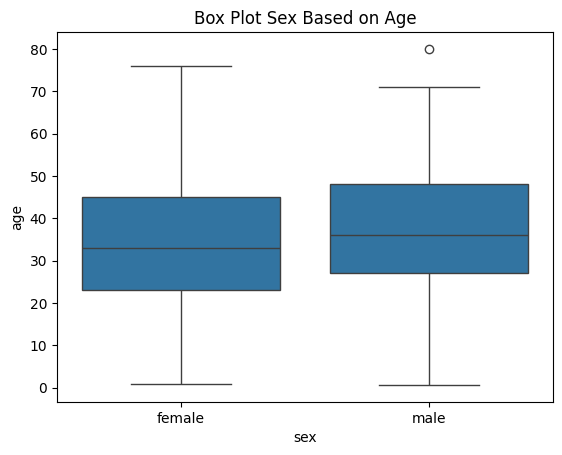

In [214]:
sns.boxplot(x='sex', y='age', data=df)
plt.title('Box Plot Sex Based on Age')
plt.show()

### Desc:
The chart shows the age distribution for females and males.

Both groups have similar age ranges, starting from around 0 years old.

The median age (middle line in the box):

Females: around 32–33 years

Males: around 35–36 years

The interquartile range (IQR) (the box itself):

Females: mostly between 23 and 47 years old

Males: mostly between 27 and 50 years old

Outliers:

There is an outlier in the male group near 80 years old, shown as a dot.

The maximum age is higher for females (around 76–77 years) compared to most males (around 71), though there’s that one male outlier.

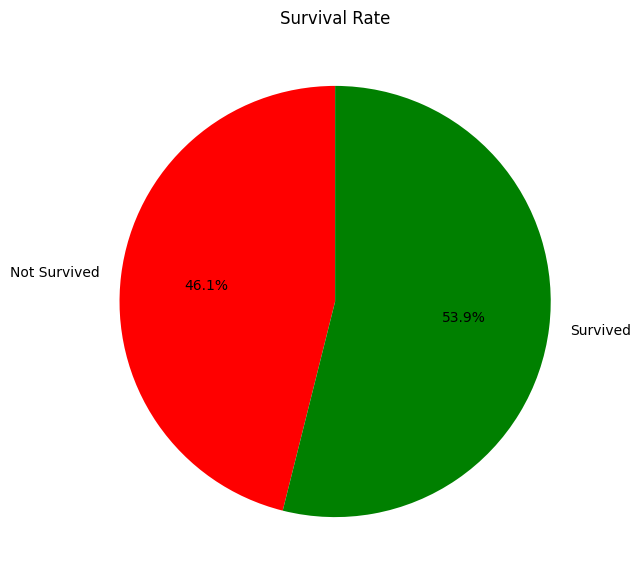

In [215]:
# Hitung jumlah yang survived dan tidak survived
survived_counts = df['survived'].value_counts()

# Tentukan label dan data untuk pie chart
labels = ['Not Survived', 'Survived']
sizes = [survived_counts[0], survived_counts[1]]

# Buat pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.title('Survival Rate')
plt.show()

<Figure size 1200x600 with 0 Axes>

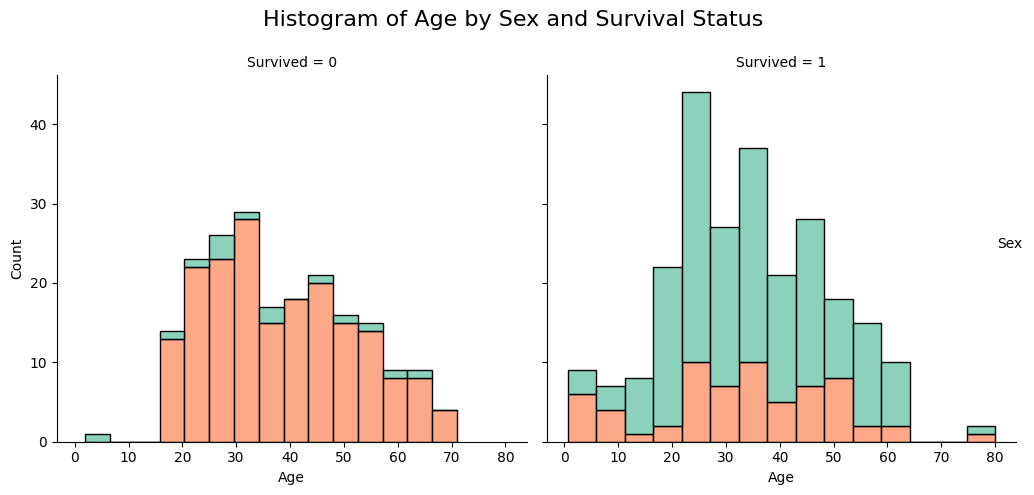

In [216]:
# Visualisasi histogram usia berdasarkan jenis kelamin dan status selamat
plt.figure(figsize=(12, 6))

g = sns.FacetGrid(df, col="survived", height=5, aspect=1)
g.map_dataframe(sns.histplot, x="age", hue="sex", multiple="stack", bins=15, palette="Set2")
g.set_axis_labels("Age", "Count")
g.set_titles(col_template="Survived = {col_name}")
g.add_legend(title="Sex")

plt.suptitle("Histogram of Age by Sex and Survival Status", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

### Observation
Most survivors were females aged 20 to 40 — shown by the tall green bars on the right.

Among those who did not survive, males (orange bars) were more common, especially in the 20 to 40 age range.

Females had a higher survival rate overall, especially in younger to middle-aged groups.

Very young children and elderly people were present in both survival outcomes, but in smaller numbers.

notes:
green: females
orange: males